In [48]:
#import all the necessary modules 

import pandas as pd #for loading and manipulating the data and for one-hot encoding
import numpy as np #for all numerical analysis like calculating mean and standard deviation
import matplotlib.pyplot as plt 
import matplotlib.colors as colors 
from sklearn.model_selection import train_test_split #split data into train and test set 
from sklearn.preprocessing import StandardScaler #scale and center data 
from sklearn.tree import DecisionTreeClassifier #this will make support vector machines for non-linear classification 
from sklearn.model_selection import GridSearchCV #this is to tune the hyperparameters
from sklearn.decomposition import PCA #to perform PCA to plot data 
from sklearn.tree import plot_tree # this will plot the classification tree
from sklearn.metrics import plot_confusion_matrix

%matplotlib inline 

In [49]:
df = pd.read_csv('processed.cleveland.data', header = None)

In [50]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [51]:
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']

In [52]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


<h3> Let us identify any missing values in the dataset </h3>

In [53]:
#let us see the data types of each column 
df.info()

#from the data below, only 'ca' and 'target' and object and int64 respectively. all the other data types are floats. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null object
thal        303 non-null object
target      303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


<h4> The fact that 'ca' and 'thal' columsn have object data types suggests there is something funny going on in them. object datatypes are used when there are mixtures of things, like a mixture of numbers and letters. In theory, both 'ca' and 'thal'
should just have a few values representing different categories, so let's investigate what's going on by printing out their unique we'll start with 'ca':
</h4>

In [54]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

<H4> from the above, the question mark represents the missing values </h4>

In [55]:
#Now, let us look at the uniques values for 'thal'

df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

<h4>from the above, 'thal' also has a missing value represented by '?' </h4>

<h4> Let use see how many rows contain missing values </h4>

In [56]:
len(df.loc[(df['ca'] == '?') | (df['thal'] == '?')])

6

In [57]:
#check out how many rows there are in the dataframe 
df.shape

(303, 14)

<h4> From the above, it is obvious that the amount of missing values are negligible and thus we can work with only the dataframe 
without missing values </h4> 

In [58]:
#we can convert all the cells with '?' to Nan 
df[df == '?'] = np.nan

In [59]:
df.shape

(303, 14)

In [60]:
#select all the rows without missing values 

df_clean = df[df.notna().all(axis = 1)]


<h4> The above can be interpreted as select only the data frame where there are no missing values in any columns </h4>

In [61]:
df_clean.shape

(297, 14)

In [62]:
#test to see that the dataset has no missing values 
df_clean['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [63]:
df_clean['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

<h4> firstly, our target variable have multiple classes ranging from 0 up to 4. Given that 0 stands for the negative class, 
1 to 4 represents the positive class which stands for multiple types of heart disease </h4>

<h4> this needs to be corrected <h4>

In [64]:
df_clean['target'].unique()

array([0, 2, 1, 3, 4])

In [65]:
df_clean['target'] = df_clean['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [66]:
df_clean['target'].unique()

array([0, 1])

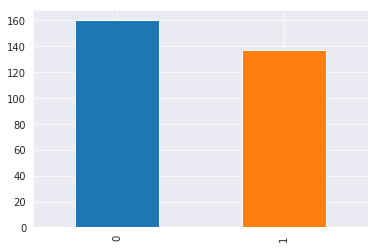

In [67]:
#plot of the target variable
df_clean['target'].value_counts().plot.bar();

<h3> Time to split our data into predictor and target variables </h3>

<h4> Note: Copy() is used to ensure what ever formatting we make to X and y does not affect the original dataframe </h4>

In [68]:
X = df_clean.drop(['target'], axis = 1).copy()
y = df_clean['target'].copy()

In [69]:
X.shape, y.shape

((297, 13), (297,))

<h3> Encoding our variables </h3>

<h3> NOTE: that variables like 'cp', 'restecg', 'slope', 'thal' are categories that needs to be encoded  </h3>

<h4> For this, we will use pd.get_dummies() </h4> 

In [70]:
X = pd.get_dummies(X, columns= ['cp', 'restecg', 'slope', 'thal', 'ca', 'exang'], drop_first  = True)

In [71]:
#test the code 
X.head()

,age,sex,trestbps,chol,fbs,thalach,oldpeak,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0,ca_1.0,ca_2.0,ca_3.0,exang_1.0
0,63.0,1.0,145.0,233.0,1.0,150.0,2.3,0,0,0,0,1,0,1,1,0,0,0,0,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.5,0,0,1,0,1,1,0,0,0,0,0,1,1
2,67.0,1.0,120.0,229.0,0.0,129.0,2.6,0,0,1,0,1,1,0,0,1,0,1,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,3.5,0,1,0,0,0,0,1,0,0,0,0,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,1.4,1,0,0,0,1,0,0,0,0,0,0,0,0


<h3> plot the decision boundary </h3>

<H4> Note: The good part with decision tree is the fact that it can handle linear and non_linear decision boundaries </h4>

In [72]:
#first we select the top 6 best feature and plot our decision boundary with it 

from sklearn.feature_selection import chi2, f_classif, SelectKBest
import seaborn as sns
sns.set_style('darkgrid')

In [73]:
bestf = SelectKBest(chi2, k = 6).fit(X,y).transform(X)

In [74]:
bestf

array([[ 63. , 150. ,   2.3,   0. ,   0. ,   0. ],
       [ 67. , 108. ,   1.5,   1. ,   0. ,   1. ],
       [ 67. , 129. ,   2.6,   1. ,   1. ,   1. ],
       ...,
       [ 68. , 141. ,   3.4,   1. ,   1. ,   0. ],
       [ 57. , 115. ,   1.2,   1. ,   1. ,   1. ],
       [ 57. , 174. ,   0. ,   0. ,   0. ,   0. ]])

In [75]:
bestf_columns = X.columns[SelectKBest(chi2, k = 6).fit(X,y).get_support()]

In [76]:
bestf_columns

Index(['age', 'thalach', 'oldpeak', 'cp_4.0', 'thal_7.0', 'exang_1.0'], dtype='object')

In [77]:
#make a dummy dataframe of the target variable 
target = pd.DataFrame(y, columns = ['target'])

In [78]:
df_decision = pd.DataFrame(bestf, columns = bestf_columns).join(target) 

In [79]:
df_decision.head()

,age,thalach,oldpeak,cp_4.0,thal_7.0,exang_1.0,target
0,63.0,150.0,2.3,0.0,0.0,0.0,0.0
1,67.0,108.0,1.5,1.0,0.0,1.0,1.0
2,67.0,129.0,2.6,1.0,1.0,1.0,1.0
3,37.0,187.0,3.5,0.0,0.0,0.0,0.0
4,41.0,172.0,1.4,0.0,0.0,0.0,0.0


In [80]:
bestf_columns.tolist()

['age', 'thalach', 'oldpeak', 'cp_4.0', 'thal_7.0', 'exang_1.0']

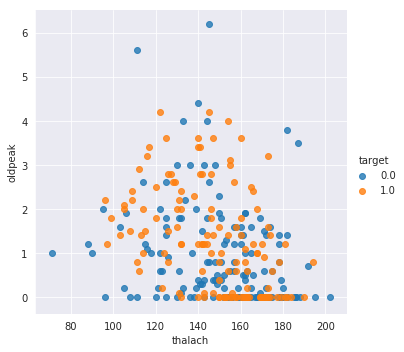

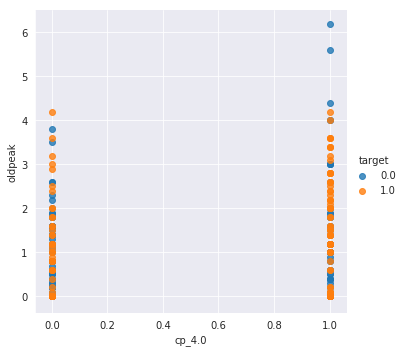

In [81]:
def plot_decision_boundary(col1, col2, dataframe = df_decision):
    sns.lmplot(x = col1, y =col2, data = dataframe, hue = 'target', fit_reg = False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.plot()
    
plot_decision_boundary('thalach', 'oldpeak')
plot_decision_boundary('cp_4.0', 'oldpeak')

<h4>from the above, it shows that we are clearly dealing with a non-Linear decision boundary as the two classes of 0 and 1 and mixed up together 
</h4>

<h2> Centering and Scaling <h2> 

<h4> We begin by splitting our data into train and test dataset to avoid data leakage </h4

In [82]:
from sklearn.model_selection import StratifiedKFold

In [83]:
kfolds = StratifiedKFold(n_splits = 5)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 25, stratify = y, test_size = 0.2)

In [85]:
X_train.shape, y_train.shape

((237, 20), (237,))

In [86]:
X_test.shape, y_test.shape

((60, 20), (60,))

In [87]:
from sklearn.utils import resample

In [88]:
sample = pd.concat([X_train, y_train], axis = 1)

In [89]:
no_hd = sample[sample['target'] == 0]
hd = sample[sample['target'] == 1]

In [90]:
no_hd.shape, hd.shape

((128, 21), (109, 21))

<h4> I want to downsample the positive class (which in this case is the 0) to equal to negative class (which in this case is 1) </h4> 

In [91]:
down_sample = resample(no_hd, replace = False, n_samples = len(hd), random_state = 10)

In [92]:
#test 
down_sample.shape

(109, 21)

In [94]:
resample = pd.concat([down_sample, hd], axis = 0, ignore_index= True)

In [95]:
X_train = resample.drop('target', axis = 1)
y_train = resample['target']

In [96]:
X_train.shape, y_train.shape

((218, 20), (218,))

<h4> we are going to build a pipeline object with which to encapsulate and include processes for feature_selection, centering and scaling, impute missing values</h4> 

In [97]:
from sklearn.pipeline import Pipeline

In [98]:
from sklearn.impute import SimpleImputer # a transformer in the pipepline
from sklearn.metrics import make_scorer, f1_score  #for use during the hyperparameter tuning 
from sklearn.feature_selection import f_classif, SelectKBest # a transformer in the pipeline 
from sklearn.preprocessing import StandardScaler #a transformer in the pipeline


In [99]:
#instantiate the simple imputer 
imp = SimpleImputer()

In [100]:
#instantiate the selectkbest
kbest = SelectKBest(f_classif)

In [101]:
#instantiate the standard scaler
scale = StandardScaler()

In [102]:
#instantiate the make_scorer
scorer = make_scorer(f1_score, average = 'weighted')

In [105]:
#instantiate your Decision tree classifier 
decision_tree = DecisionTreeClassifier(random_state= 42)

In [106]:
#put all into the pipeline object using a series of step 
steps =[('imputation', imp), ('bestfeature', kbest), ('scaler', scale), ('decision_tree', decision_tree)]

In [107]:
pipeline = Pipeline(steps)

<H3> Time to tune hyperparameters </h3>

<h4> Start by defining the parameters of the GridSearch </h4>

In [108]:
params = {'bestfeature__k': np.arange(2, 20, 1), 'decision_tree__criterion': ['gini', 'entropy'], 'decision_tree__max_depth': np.arange(1, X.shape[1], 1)}

In [109]:
gridsearch = GridSearchCV(pipeline, param_grid= params, cv = kfolds, scoring = scorer)

In [110]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('imputation', SimpleImputer()),
                                       ('bestfeature', SelectKBest()),
                                       ('scaler', StandardScaler()),
                                       ('decision_tree',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'bestfeature__k': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'decision_tree__criterion': ['gini', 'entropy'],
                         'decision_tree__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             scoring=make_scorer(f1_score, average=weighted))

In [111]:
y_pred = gridsearch.predict(X_test)

In [112]:
gridsearch.best_params_

{'bestfeature__k': 12,
 'decision_tree__criterion': 'gini',
 'decision_tree__max_depth': 4}

<Figure size 648x648 with 0 Axes>

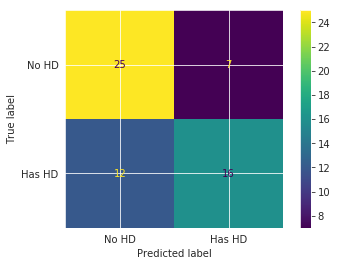

In [121]:
plt.figure(figsize = (9, 9));
plot_confusion_matrix(gridsearch, X_test, y_test, display_labels= ['No HD', 'Has HD']);

In [122]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

In [123]:
f1_score(y_test, y_pred)

0.6274509803921569

In [124]:
precision_score(y_test, y_pred)

0.6956521739130435

In [125]:
recall_score(y_test, y_pred)

0.5714285714285714

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.78      0.72        32
           1       0.70      0.57      0.63        28

    accuracy                           0.68        60
   macro avg       0.69      0.68      0.68        60
weighted avg       0.68      0.68      0.68        60



In [129]:
gridsearch.best_estimator_

Pipeline(steps=[('imputation', SimpleImputer()),
                ('bestfeature', SelectKBest(k=12)),
                ('scaler', StandardScaler()),
                ('decision_tree',
                 DecisionTreeClassifier(max_depth=4, random_state=42))])

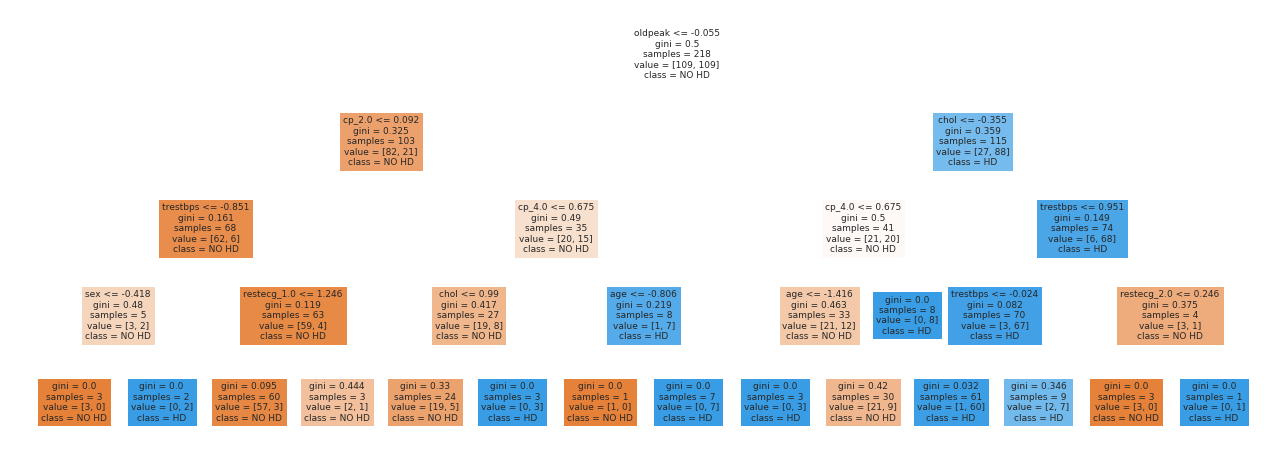

In [146]:
plt.figure(figsize = (22, 8)); 
plot_tree(gridsearch.best_estimator_.steps[3][1], class_names= ['NO HD', 'HD'], fontsize = 9, filled = True, feature_names= X_train.columns);

<h4> Let us do cost complexity prunining to see if accuracy has been improved </h4> 

In [147]:
params = {'bestfeature__k': np.arange(2, 20, 1), 'decision_tree__criterion': ['gini', 'entropy'], 'decision_tree__ccp_alpha': np.linspace(0.001, 1, num = 500)}

In [148]:
gridsearch_prune = GridSearchCV(pipeline, param_grid= params, cv = kfolds, scoring = scorer)

In [149]:
gridsearch_prune.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('imputation', SimpleImputer()),
                                       ('bestfeature', SelectKBest()),
                                       ('scaler', StandardScaler()),
                                       ('decision_tree',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'bestfeature__k': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'decision_tree_...
       0.9519519 , 0.95395391, 0.95595591, 0.95795792, 0.95995992,
       0.96196192, 0.96396393, 0.96596593, 0.96796794, 0.96996994,
       0.97197194, 0.97397395, 0.97597595, 0.97797796, 0.97997996,
       0.98198196, 0.98398397, 0.98598597, 0.98798798, 0.98998998,
       0.99199198, 0.99399399, 0.99599599, 0.997998  , 1.        ]),
                         'decision_tree__criterion': ['g

In [150]:
gridsearch_prune.best_params_

{'bestfeature__k': 13,
 'decision_tree__ccp_alpha': 0.01101002004008016,
 'decision_tree__criterion': 'gini'}

In [151]:
y_pred_prune = gridsearch_prune.predict(X_test)

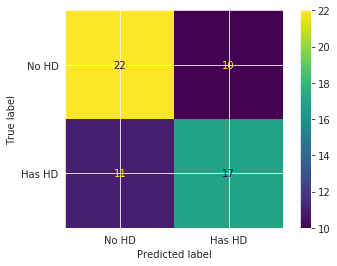

In [152]:
plot_confusion_matrix(gridsearch_prune, X_test, y_test, display_labels= ['No HD', 'Has HD']);

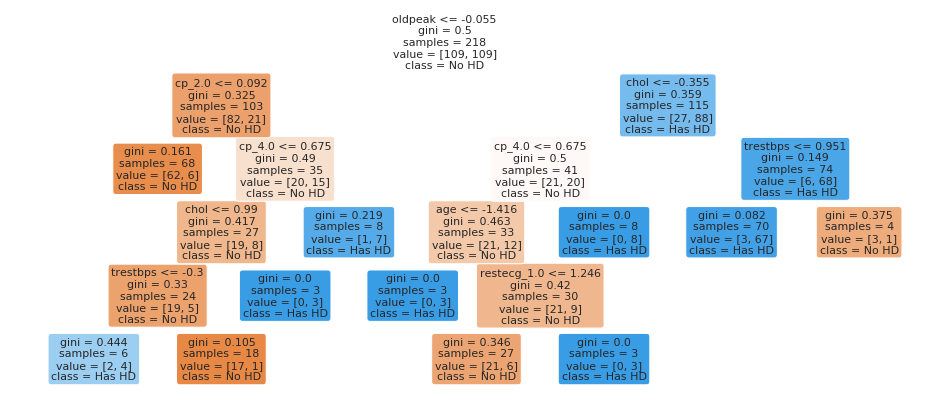

In [153]:
plt.figure(figsize = (16, 7))
plot_tree(gridsearch_prune.best_estimator_.steps[3][1], filled = True, class_names= ['No HD', 'Has HD'], rounded= True, fontsize = 11, feature_names= X_train.columns);